
Digits Dataset
Loading the Data (Digits Dataset)

The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.


In [42]:


%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()



Now that you have the dataset loaded you can use the commands below

In [43]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

('Image Data Shape', (1797, 64))
('Label Data Shape', (1797,))



Image Data Shape (1797, 64)
Label Data Shape (1797,)


('Label Data Shape', (1797,))


Showing the Images and Labels (Digits Dataset)

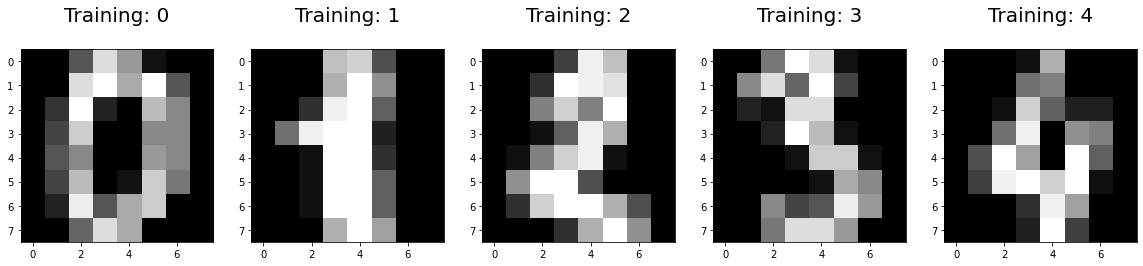

In [44]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


Splitting Data into Training and Test Sets (Digits Dataset)

In [45]:


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=50)




Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

Step 1. Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:


#Step 2. Make an instance of the Model


In [48]:
logisticRegr = LogisticRegression()



Step 3. Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)


In [49]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()



Step 4. Predict the labels of new data (new images)

Uses the information the model learned during the model training process


In [50]:

# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))



array([8])

In [51]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([8, 3, 7, 6, 2, 0, 4, 1, 9, 7])

In [52]:


# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)




Measuring Model Performance (Digits Dataset)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. To do this are going to see how the model performs on the new data (test set)

accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points


In [53]:


# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)



0.96



Confusion Matrix (Digits Dataset)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section,two python packages (Seaborn and Matplotlib) for making confusion matrixes.


In [54]:
import numpy as np 

import seaborn as sns
from sklearn import metrics

Method 1 (Seaborn)

In [55]:
cm = metrics.confusion_matrix(y_test, predictions)

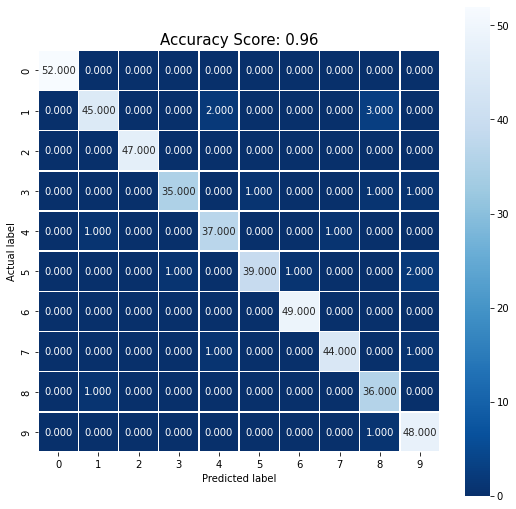

In [56]:


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();





Method 2 (Matplotlib)

matplotlib


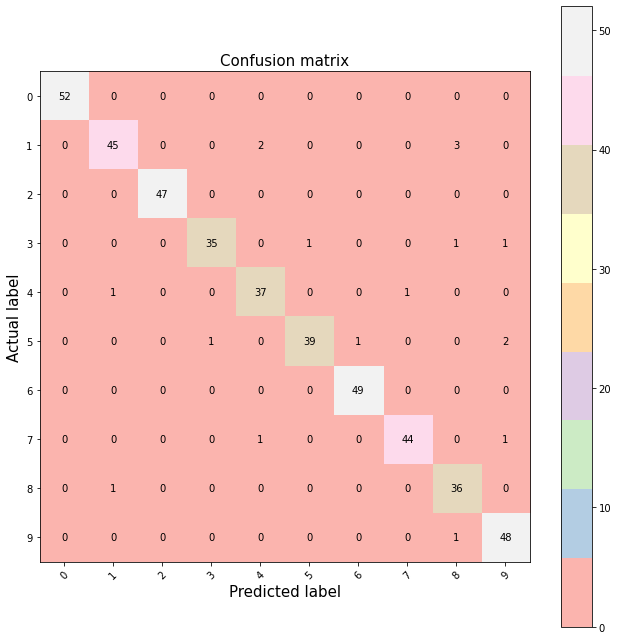

In [57]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('toy_Digits_ConfusionMatplotlibCodementor.png')
#plt.show()